## Advertisement Click-Through Rates with Decision Tree

In [7]:
!python3 -m pip install dtreeviz
!python3 -m pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [8]:
import pandas as pd
import graphviz
import dtreeviz
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [9]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import BayesianRidge
from sklearn import tree
from sklearn.linear_model import ridge_regression
from scipy.special import binom
from scipy.stats import chi2_contingency, mannwhitneyu, norm, t, ttest_ind

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

In [10]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not click', 'click']); ax.yaxis.set_ticklabels(['did not click', 'click']) 
    plt.show() 

In [11]:
df = pd.read_csv('/Users/elizabethmedlin/Downloads/CTR-Adverts/Ad_click_prediction_train (1).csv')

df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [12]:
df.dtypes

session_id                  int64
DateTime                   object
user_id                     int64
product                    object
campaign_id                 int64
webpage_id                  int64
product_category_1          int64
product_category_2        float64
user_group_id             float64
gender                     object
age_level                 float64
user_depth                float64
city_development_index    float64
var_1                       int64
is_click                    int64
dtype: object

In [13]:
df.shape

(463291, 15)

In [14]:
df.value_counts(['product_category_1'])
df.value_counts(['city_development_index'])


city_development_index
2.0                       147643
3.0                        88709
4.0                        67166
1.0                        34644
Name: count, dtype: int64

In [15]:
df.value_counts(['user_group_id'])

user_group_id
3.0              140317
2.0              137278
4.0               50080
1.0               41946
5.0               21989
9.0               20264
10.0              13779
11.0               8839
8.0                6223
6.0                1724
7.0                1421
12.0               1035
0.0                 153
Name: count, dtype: int64

In [16]:
df.isnull().sum()/len(df)*100

session_id                 0.000000
DateTime                   0.000000
user_id                    0.000000
product                    0.000000
campaign_id                0.000000
webpage_id                 0.000000
product_category_1         0.000000
product_category_2        78.968510
user_group_id              3.937698
gender                     3.937698
age_level                  3.937698
user_depth                 3.937698
city_development_index    27.008727
var_1                      0.000000
is_click                   0.000000
dtype: float64

In [17]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['gender'] = LE.fit_transform(df['gender'])
df['product'] = LE.fit_transform(df['product'])

df['DateTime'] = pd.to_datetime(df['DateTime'])
df['DateTime'] = df['DateTime'].dt.hour
df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,0,858557,2,359520,13787,4,NaN,10.0,0,4.0,3.0,3.0,0,0
1,333291,0,243253,2,105960,11085,5,NaN,8.0,0,2.0,2.0,NaN,0,0
2,129781,0,243253,2,359520,13787,4,NaN,8.0,0,2.0,2.0,NaN,0,0
3,464848,0,1097446,8,359520,13787,3,NaN,3.0,1,3.0,3.0,2.0,1,0
4,90569,0,663656,2,405490,60305,3,NaN,2.0,1,2.0,3.0,2.0,1,0


In [18]:
import random

df.drop(labels=['product_category_2'], axis=1)
df.dropna(subset=['user_group_id', 'gender', 'user_depth', 'age_level'], inplace=True)
df.isnull().sum()


session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        351379
user_group_id                  0
gender                         0
age_level                      0
user_depth                     0
city_development_index    106886
var_1                          0
is_click                       0
dtype: int64

In [45]:
num_missing = df['city_development_index'].isnull().sum()
if num_missing > 0:
    missing_indices = df['city_development_index'].isnull()
    num_missing_values = num_missing
    replace_values = np.random.choice([1, 2, 3,4], size=num_missing_values, p=[0.25, 0.25,0.25,0.25])
    df['city_development_index'][missing_indices] = replace_values

#df_clean['city_development_index'].fillna(random.choice(df_clean['city_development_index'][df_clean['city_development_index'].notna()]))

df_clean = df.drop(['product_category_2'], axis=1)
df_clean.isnull().sum()

/var/folders/dw/79qp9p852ylcrdgr4j2433fm0000gn/T/ipykernel_16171/4288336762.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/dw/79qp9p852ylcrdgr4j2433fm0000gn/T/ipykernel_16171/4288336762.py:6: SettingWithCopyWarning: 
A value 

session_id                0
DateTime                  0
user_id                   0
product                   0
campaign_id               0
webpage_id                0
product_category_1        0
user_group_id             0
gender                    0
age_level                 0
user_depth                0
city_development_index    0
var_1                     0
is_click                  0
dtype: int64

In [46]:
df_clean.shape

(445048, 14)

In [47]:
df_clean.dtypes

session_id                  int64
DateTime                    int32
user_id                     int64
product                     int64
campaign_id                 int64
webpage_id                  int64
product_category_1          int64
user_group_id             float64
gender                      int64
age_level                 float64
user_depth                float64
city_development_index    float64
var_1                       int64
is_click                    int64
dtype: object

In [48]:
df_clean.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,0,858557,2,359520,13787,4,10.0,0,4.0,3.0,3.0,0,0
1,333291,0,243253,2,105960,11085,5,8.0,0,2.0,2.0,2.0,0,0
2,129781,0,243253,2,359520,13787,4,8.0,0,2.0,2.0,1.0,0,0
3,464848,0,1097446,8,359520,13787,3,3.0,1,3.0,3.0,2.0,1,0
4,90569,0,663656,2,405490,60305,3,2.0,1,2.0,3.0,2.0,1,0


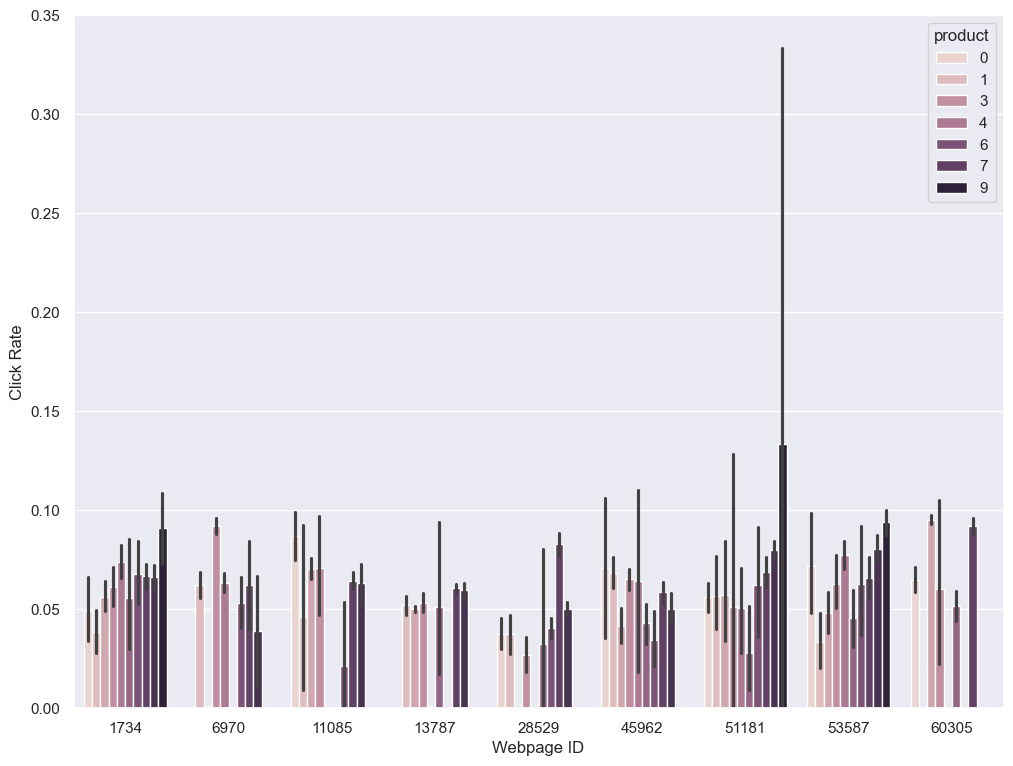

In [49]:
sns.set_theme(sns.set_theme(rc={'figure.figsize':(12,9)}))
sns.barplot(data=df_clean, x='webpage_id', y='is_click', hue='product', )
plt.xlabel('Webpage ID')
plt.ylabel('Click Rate')
plt.show()

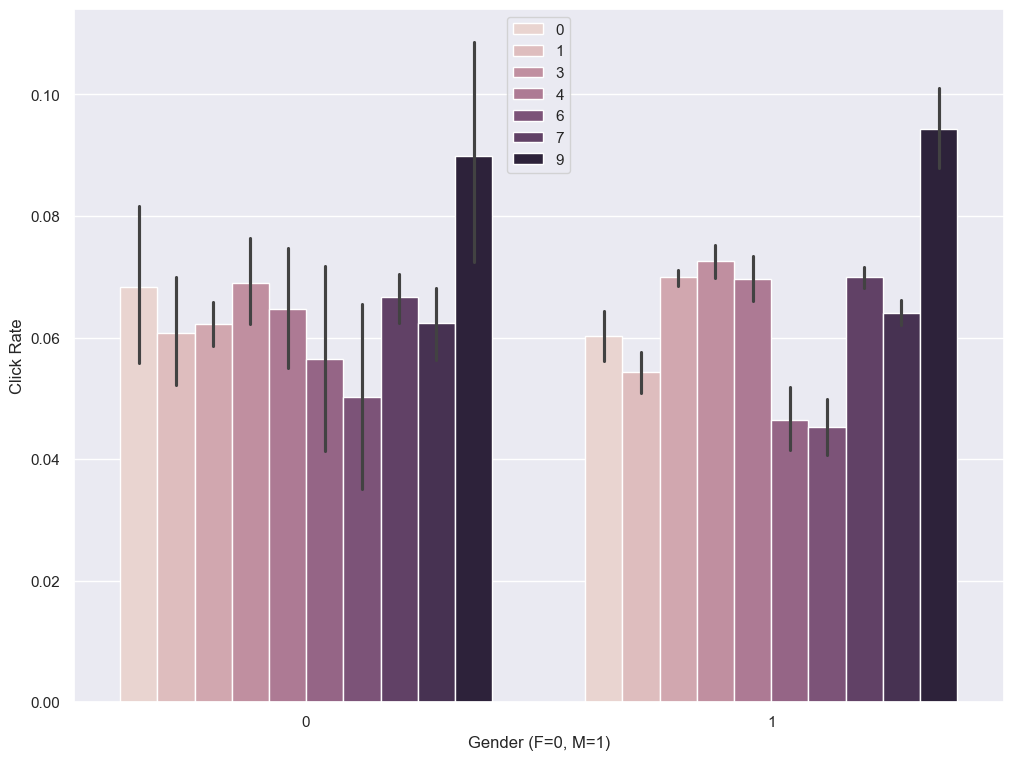

In [50]:
#The advertisement for product 9 on website 51181 has a wide confidence interval.

sns.barplot(data=df_clean, x='gender', y='is_click', hue='product')
plt.xlabel('Gender (F=0, M=1)')
plt.ylabel('Click Rate')
plt.legend(loc='upper center')
plt.show()

<Axes: xlabel='is_click', ylabel='count'>

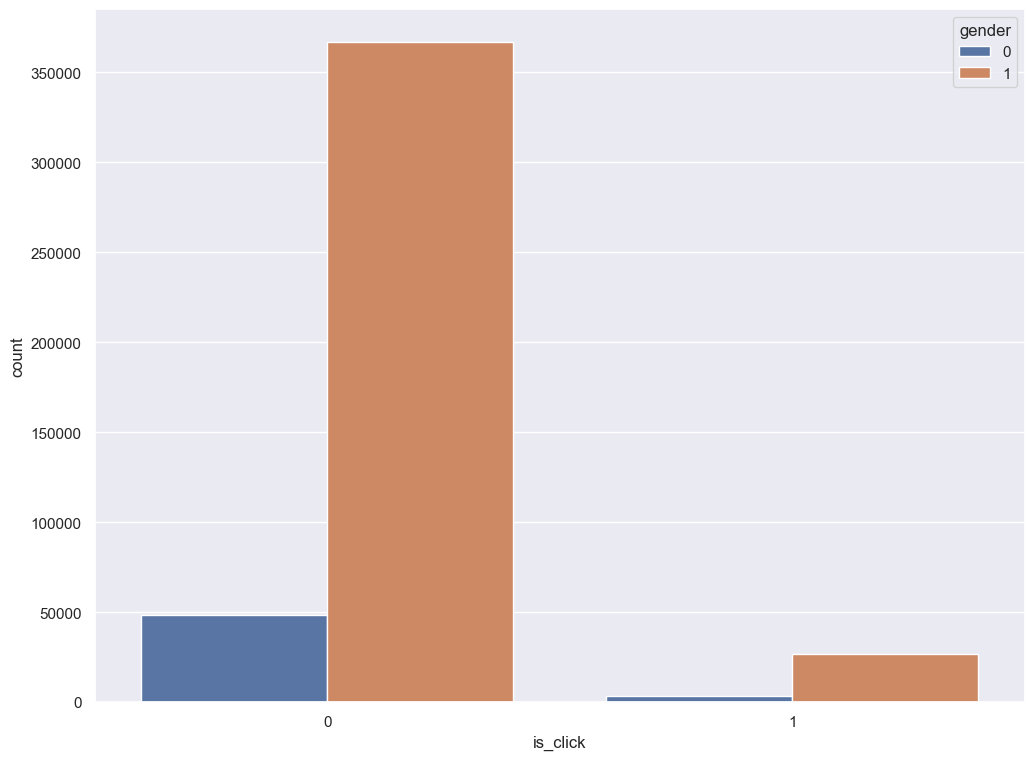

In [51]:
#Product 9 sells well across the board, and product 5 and 6 slightly outperforms among women.
sns.countplot(x=df_clean['is_click'],hue=df_clean['gender'])

In [52]:
df_clean.value_counts(['gender'])

gender
1         393454
0          51594
Name: count, dtype: int64

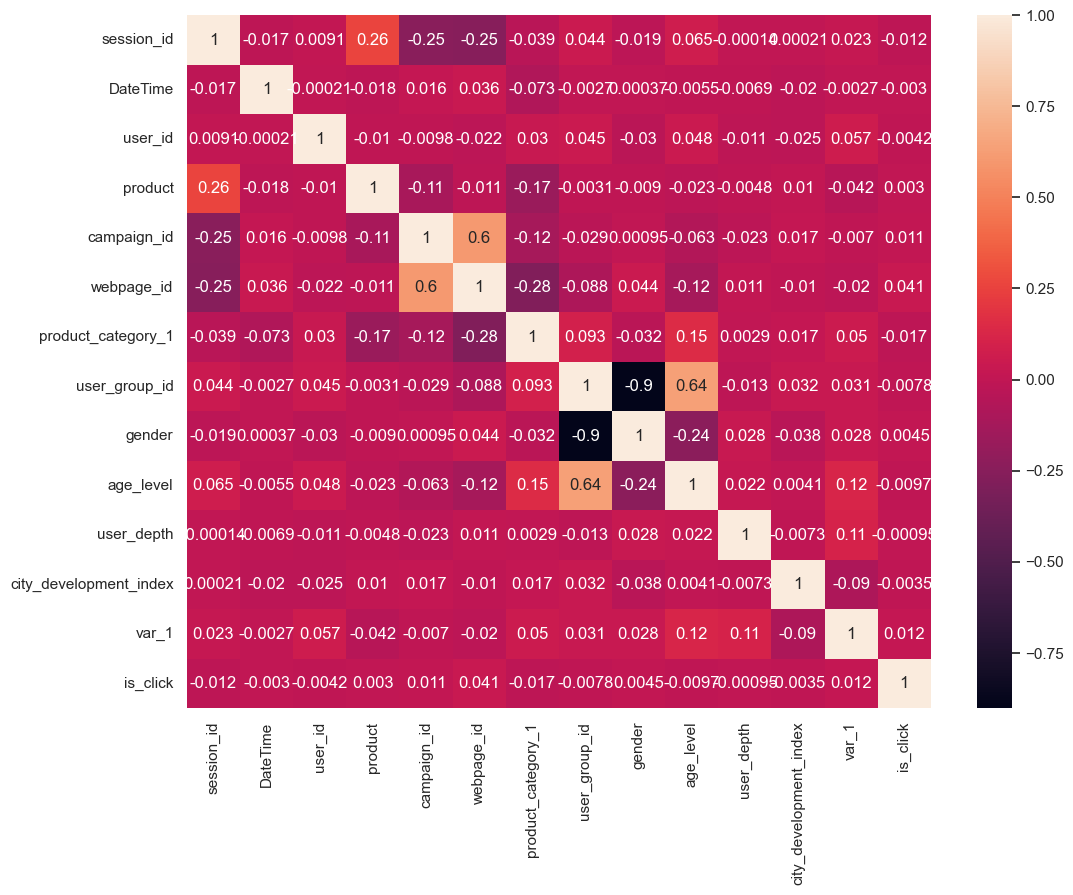

In [53]:
corr = df_clean.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)
plt.show()

Webpage and Campaign IDs correlate at 0.6, suggesting targeted advertising for different websites. There is an exceptionally negative correlation between user ID and gender, likely due to the one-hot encoding.

No individual variable carries a strong correlation with clickthrough rate.

In [54]:
df_clean.columns

Index(['session_id', 'DateTime', 'user_id', 'product', 'campaign_id',
       'webpage_id', 'product_category_1', 'user_group_id', 'gender',
       'age_level', 'user_depth', 'city_development_index', 'var_1',
       'is_click'],
      dtype='object')

In [55]:
Y = df_clean['is_click'].to_numpy()
type(Y)

test_df = df_clean.drop(['is_click'], axis=1)

transform = preprocessing.StandardScaler()
X=transform.fit_transform(test_df)
X[0:5]

array([[-0.85954313, -2.46656755,  0.94711167, -0.86830055,  0.40529009,
        -0.7367351 ,  0.70411357,  2.70323727, -2.76151485,  1.13838885,
         0.30386292,  0.4691597 , -0.86469181],
       [ 0.28313801, -2.46656755, -0.92049566, -0.86830055, -1.59973444,
        -0.86239557,  1.47331344,  1.87435446, -2.76151485, -0.73129537,
        -2.19532552, -0.55911603, -0.86469181],
       [-0.92426506, -2.46656755, -0.92049566, -0.86830055,  0.40529009,
        -0.7367351 ,  0.70411357,  1.87435446, -2.76151485, -0.73129537,
        -2.19532552, -1.58739176, -0.86469181],
       [ 1.06365162, -2.46656755,  1.67220178,  1.35487548,  0.40529009,
        -0.7367351 , -0.0650863 , -0.19785254,  0.36212009,  0.20354674,
         0.30386292, -0.55911603,  1.15648141],
       [-1.15690567, -2.46656755,  0.35553655, -0.86830055,  0.76879765,
         1.42665256, -0.0650863 , -0.61229394,  0.36212009, -0.73129537,
         0.30386292, -0.55911603,  1.15648141]])

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(test_df, Y, test_size=0.2, random_state=42)


In [57]:
clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 0)
clf.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.5, 0.875, 'webpage_id <= 52384.0\ngini = 0.126\nsamples = 356038\nvalue = [332001.0, 24037.0]'),
 Text(0.25, 0.625, 'campaign_id <= 112280.5\ngini = 0.113\nsamples = 260535\nvalue = [244918, 15617]'),
 Text(0.125, 0.375, 'product_category_1 <= 3.5\ngini = 0.131\nsamples = 68076\nvalue = [63296, 4780]'),
 Text(0.0625, 0.125, 'gini = 0.122\nsamples = 37162\nvalue = [34740, 2422]'),
 Text(0.1875, 0.125, 'gini = 0.141\nsamples = 30914\nvalue = [28556, 2358]'),
 Text(0.375, 0.375, 'product <= 6.5\ngini = 0.106\nsamples = 192459\nvalue = [181622, 10837]'),
 Text(0.3125, 0.125, 'gini = 0.097\nsamples = 103729\nvalue = [98443, 5286]'),
 Text(0.4375, 0.125, 'gini = 0.117\nsamples = 88730\nvalue = [83179, 5551]'),
 Text(0.75, 0.625, 'product_category_1 <= 2.5\ngini = 0.161\nsamples = 95503\nvalue = [87083, 8420]'),
 Text(0.625, 0.375, 'product <= 7.5\ngini = 0.137\nsamples = 30888\nvalue = [28611, 2277]'),
 Text(0.5625, 0.125, 'gini = 0.121\nsamples = 19410\nvalue = [18159, 1251]'),
 Tex

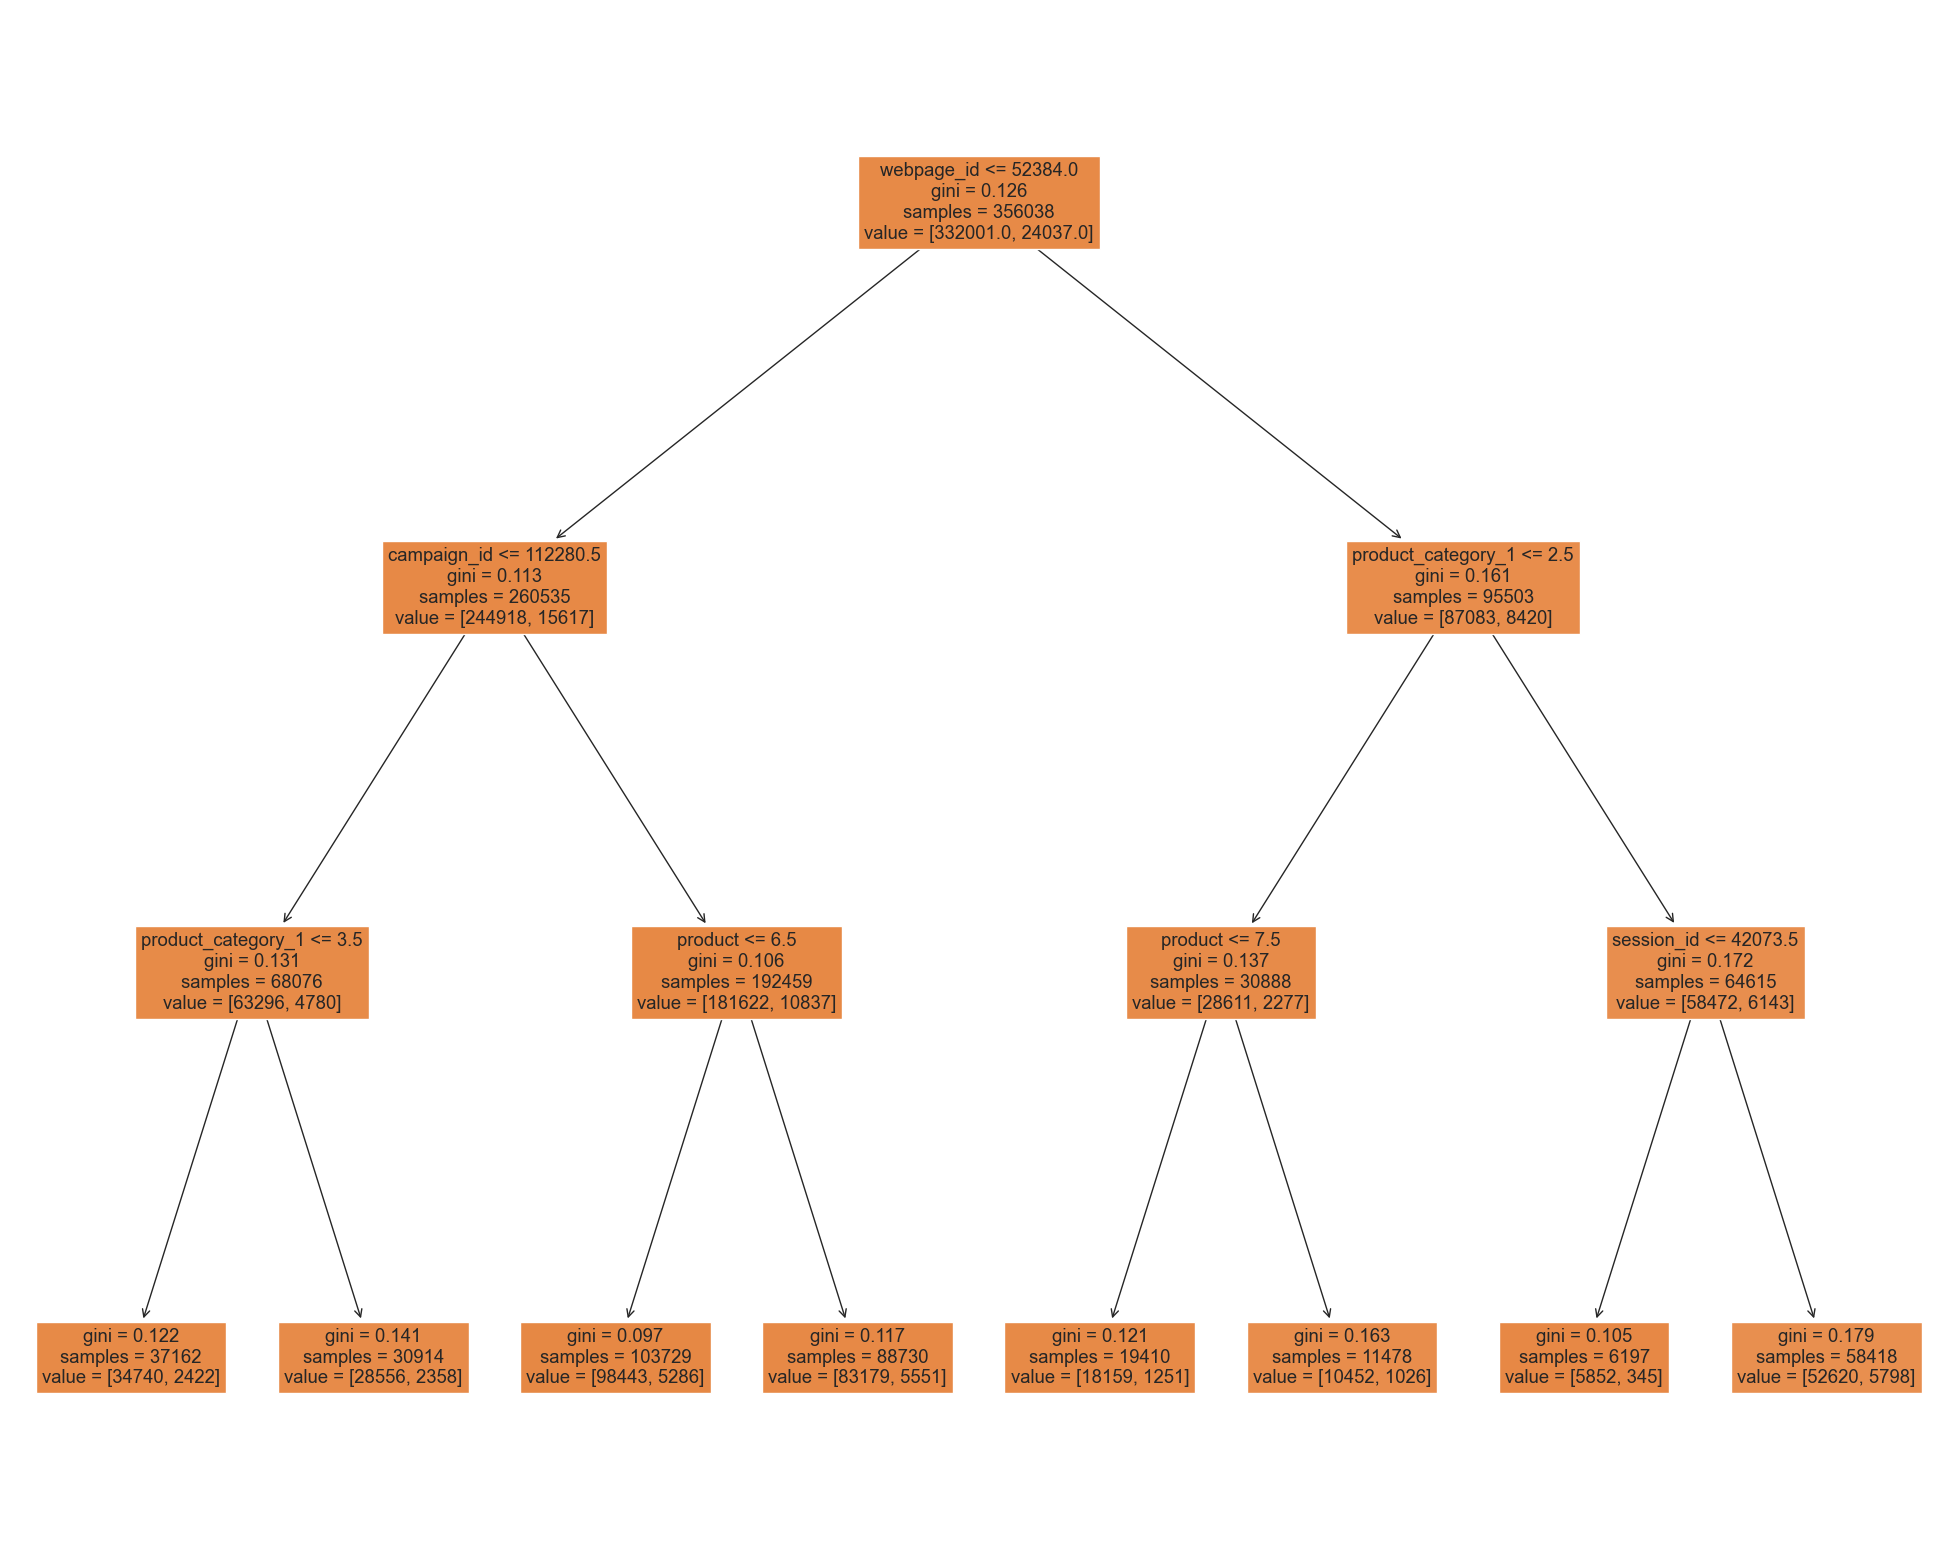

In [75]:
from dtreeviz.trees import *

fn = list(test_df.columns)

fig = plt.figure(figsize=(25,20))
graph = tree.plot_tree(clf, 
                   feature_names=fn,  
                   filled=True)
graph

The decision tree reproduces the hypothesis that targeted advertisements based on webpage ID have the strongest predictive power in regard to click-through rate.